### How to take labeled AnnData object and Calculate Gene Ditributions

In [29]:
import squidpy as sq
from hest import iter_hest
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np

#### Get AnnData from SpatialliBD
* Using MISC1 for now sample 151676

In [30]:
id  = 'MISC1'
sample = ad.read_h5ad(f"methods/{id}.h5")
sample.obs.columns

Index(['in_tissue', 'array_row', 'array_col', 'pxl_col_in_fullres',
       'pxl_row_in_fullres', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mito',
       'log1p_total_counts_mito', 'pct_counts_mito', '151676_deepst.csv',
       '151676_deepst_5_clusters.csv', '151676_deepst_8_clusters.csv',
       '151676_MISC1spagcn_2_clusters.csv', '151676_deepst_6_clusters.csv',
       '151676_deepst_9_clusters.csv', '151676_deepst_7_clusters.csv',
       '151676_deepst_2_clusters.csv', '151676_MISC1spagcn_3_clusters.csv',
       '151676_MISC1spagcn_5_clusters.csv', '151676_deepst_4_clusters.csv',
       '151676_MISC1spagcn_4_clusters.csv', '151676_MISC1spagcn.csv',
       '151676_deepst_3_clusters.csv'],
      dtype='object')

### Use Moran's I to calculate Spatially Variable Genes

In [ ]:
from sdi_variation.downstream import Morans_I
Morans_I(sample)
plt.hist(sample.uns["moranI"]['I'].dropna())

/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/scanpy/metrics/_common.py:72: UserWarning: 12226 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?/s]

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
MBP,True,False,False,False,False,False,False,False,False
MT-CO1,True,False,False,False,False,False,False,False,False
GFAP,True,False,False,False,False,False,False,False,False
MT-CO2,True,False,False,False,False,False,False,False,False
MT-ND1,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
AC004556.1,False,True,False,False,False,False,True,False,False
AC233755.2,False,False,False,False,False,False,False,False,False
AC233755.1,False,False,False,False,False,False,False,False,False
AC213203.1,False,True,False,False,False,False,True,False,False


Index(['MBP', 'MT-CO1', 'GFAP', 'MT-CO2', 'MT-ND1', 'MT-ATP6', 'MT-CO3',
       'MT-ND4', 'PLP1', 'MT-ND2', 'MT-CYB', 'SCGB2A2', 'MT-ND3', 'CNP',
       'MOBP', 'CRYAB', 'SCGB1D2', 'MT-ND5', 'NDUFA4', 'TF', 'MGP',
       'MTRNR2L12'],
      dtype='object')

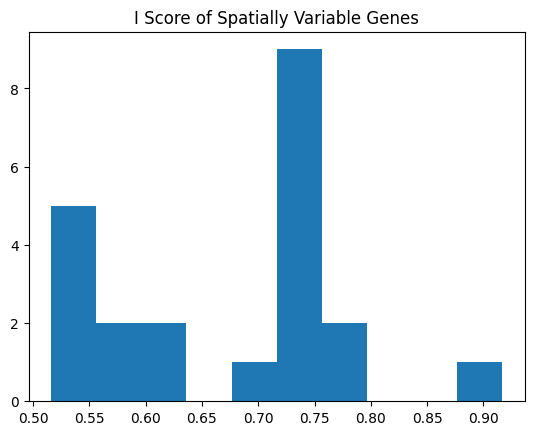

In [ ]:
i_score = sample.uns['moranI']
t = 0.5 # spatial clustering threshold
genes_of_interest = i_score['I'] > t

plt.hist(i_score.loc[genes_of_interest,'I'])
plt.title("I Score of Spatially Variable Genes")
i_score[genes_of_interest].index

### Use deepst 7 clusters

Text(0, 0.5, 'Clusters')

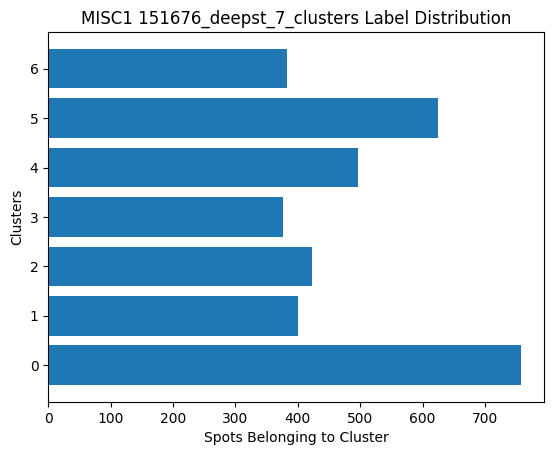

In [71]:
dst_7 = '151676_deepst_7_clusters.csv'
cluster_counts = sample.obs[dst_7].value_counts()
plt.barh(cluster_counts.index,cluster_counts)
plt.title(f"{id} {dst_7.split('.')[0]} Label Distribution")
plt.xlabel("Spots Belonging to Cluster")
plt.ylabel("Clusters")

In [ ]:
def plot_gene_dist(count_vector:np.ndarray,n_genes:int):
    plt.bar(list(range(count_vector.shape[0])),np.log(count_vector + 1))
    plt.title(f"Cluster {c} Gene Count Distribution")
    plt.xlabel("Gene ID")
    plt.ylabel(f"log(gene counts + 1)")
    plt.xlim((0,n_genes.shape[0]))

Text(0, 0.5, 'log(gene counts + 1)')

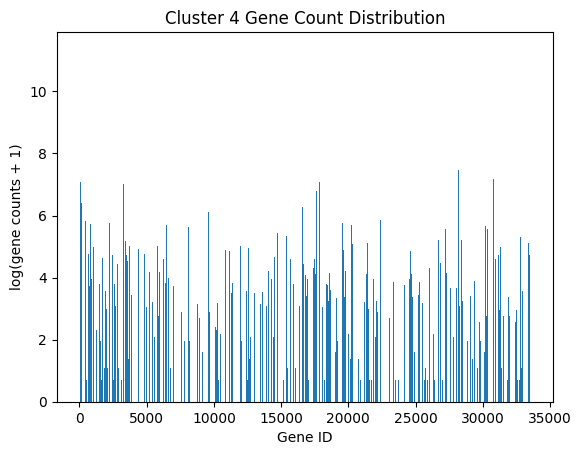

In [ ]:
c = 4
clust = sample.obs[dst_7] == c
gene_counts = sample.X.toarray()


clust_genes = sample.X.toarray()[clust,:][:,:].sum(axis = 0)
plt.bar(list(range(clust_genes.shape[0])),np.log(clust_genes + 1))
plt.title(f"Cluster {c} Gene Count Distribution")
plt.xlabel("Gene ID")
plt.ylabel(f"log(gene counts + 1)")
plt.xlim((0,gene_counts.shape[0]))